In [1]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sys

print("Python version: {}".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("seaborn version: {}".format(sns.__version__))
print("numpy version: {}".format(np.__version__))

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
matplotlib version: 3.1.3
pandas version: 1.0.1
seaborn version: 0.10.0
numpy version: 1.18.1


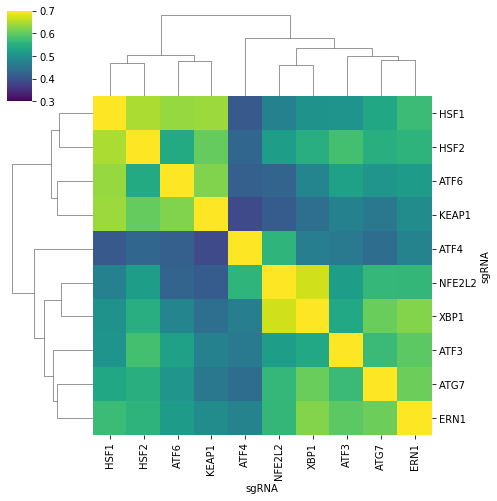

488

In [2]:
qmapp = pd.read_excel("TableS10_AUCDifferenceAndSignificance.xlsx")

new = qmapp['CellLine.Drug.sgRNA'].str.split('.sg', expand=True)
qmapp['context'],qmapp['sgRNA'] = new[0], new[1]
qmapp_raw = qmapp.copy()
qmapp = qmapp[['sgRNA', 'context', 'sgRNA-sgNT']]

qmapp = qmapp[(qmapp.sgRNA != 'SLC35F2')].dropna()
qmapp = qmapp.pivot(index='context', columns='sgRNA', values = 'sgRNA-sgNT')

qmapp_corr = qmapp.corr(method='spearman')#.rank(ascending=True)
qmapp_corr.to_csv('qmapp_corr.csv')

sns.clustermap(qmapp_corr, figsize=(7,7), metric='euclidean', method='ward', cmap='viridis', vmax=0.7, vmin=0.3
              )
plt.savefig('../figures/sonia_corr_matrix.pdf', bbox_inches='tight', transparent=True)
plt.show();plt.close()

len(qmapp)

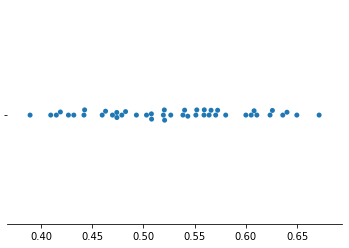

In [3]:
df = qmapp.corr(method='spearman')
df = pd.DataFrame(df.where(np.triu(np.ones(df.shape)).astype(np.bool)))#.stack())
df = df.reset_index().rename(columns={'sgRNA':'Source'}).set_index('Source').stack().reset_index()
df = df[df.Source != df.sgRNA].set_index("Source")
sns.swarmplot(df[0].values)
sns.despine(left=True)
plt.savefig('../figures/sonia_swarm.pdf', bbox_inches='tight', transparent=True)
plt.show(); plt.close()

In [4]:
qmapp_raw['drug'] = qmapp_raw['CellLine.Drug.sgRNA'].str.split('.').str[1]

subset = qmapp_raw[['sgRNA', 'drug', 'sgRNA-sgNT', 'p.value']].set_index('sgRNA')
subset = subset[subset.index != 'SLC35F2']

p = 0.05
cutoff = 60

both = subset[(subset['p.value'] < p) & (abs(subset['sgRNA-sgNT']) > cutoff)]
both.to_csv('chemo_genetic_map_qmapp_{}_{}.tsv'.format(p, cutoff), sep='\t')

sl = subset[(subset['p.value'] < p) & (subset['sgRNA-sgNT'] < -cutoff)]
sl.to_csv('chemo_genetic_map_qmapp_SL_{}_{}.tsv'.format(p, cutoff), sep='\t')

gof = subset[(subset['p.value'] < p) & (subset['sgRNA-sgNT'] > cutoff)]
gof.to_csv('chemo_genetic_map_qmapp_GOF_{}_{}.tsv'.format(p, cutoff), sep='\t')

#print(subset.head())
sl = subset[(subset['p.value'] < p/1) & (subset['sgRNA-sgNT'] < -cutoff)]